In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df  = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [9]:
df.shape

(47, 2)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [7]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [11]:
df.isnull().sum() 

year                       0
per capita income (US$)    0
dtype: int64

In [13]:
X = df.drop("year", axis = "columns")
y = df.drop("per capita income (US$)", axis = "columns")

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=6)

In [15]:
X_train

,per capita income (US$)
45,35175.188980
24,15755.820270
19,16426.725480
3,4804.463248
39,32755.176820
28,16622.671870
40,38420.522890
29,17581.024140
34,25719.147150
17,12974.806620


In [16]:
y_train

,year
45,2015
24,1994
19,1989
3,1973
39,2009
28,1998
40,2010
29,1999
34,2004
17,1987


In [17]:
X_test

,per capita income (US$)
46,34229.193630
38,37446.486090
36,32738.262900
23,15875.586730
7,7100.126170
0,3399.299037
6,7062.131392
32,19232.175560
14,10790.328720
30,18987.382410


In [18]:
y_test

,year
46,2016
38,2008
36,2006
23,1993
7,1977
0,1970
6,1976
32,2002
14,1984
30,2000


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr.coef_

array([[0.00104417]])

In [21]:
lr.intercept_

array([1973.12413209])

In [22]:
m=0.00104417
c=1973.12413209
z= m*40 + c
z

1973.16589889

In [23]:
lr.predict([[40]])

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1973.16589873]])

In [24]:
y_pred  = lr.predict(X_test)
y_pred

array([[2008.86509651],
       [2012.22448431],
       [2007.30831715],
       [1989.70088194],
       [1980.53784331],
       [1976.67356498],
       [1980.49817045],
       [1993.20571829],
       [1984.3910278 ],
       [1992.95011357]])

In [25]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["year", "per capita income (US$)","per_capita_income(US$)_predicted"])

,year,per capita income (US$),per_capita_income(US$)_predicted
0,34229.193630,2016.0,2008.865097
1,37446.486090,2008.0,2012.224484
2,32738.262900,2006.0,2007.308317
3,15875.586730,1993.0,1989.700882
4,7100.126170,1977.0,1980.537843
5,3399.299037,1970.0,1976.673565
6,7062.131392,1976.0,1980.498170
7,19232.175560,2002.0,1993.205718
8,10790.328720,1984.0,1984.391028
9,18987.382410,2000.0,1992.950114


In [26]:
lr.score(X_test,y_test)

0.8705252203503618

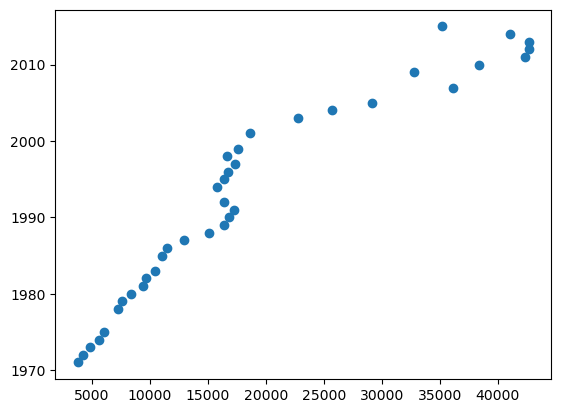

In [27]:
plt.scatter(X_train,y_train)  

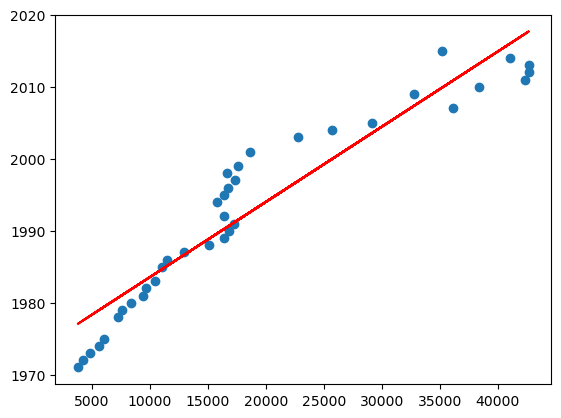

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

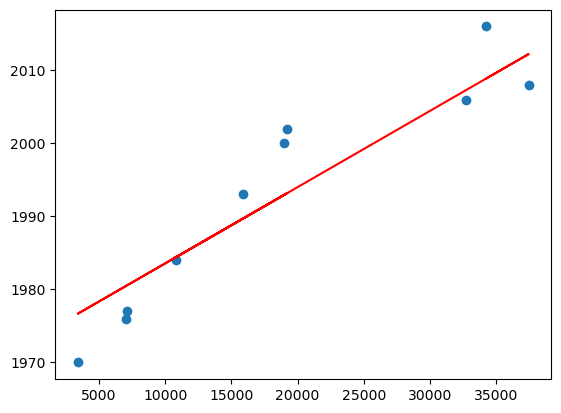

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

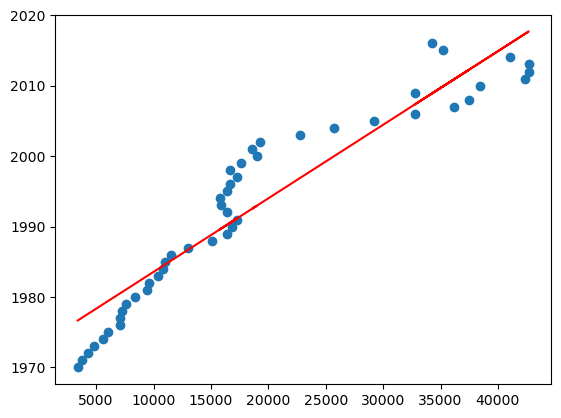

In [30]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")